In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("adult.csv")

# Adding column names to data frame
df.columns = [
'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
        'income'
]

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.dropna(inplace=True)

columns_to_drop = ['fnlwgt', 'workclass']

df = df.drop(columns=columns_to_drop)

df

,age,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Fill columns with "?" values with mode

columns_with_question_mark = df.columns[df.apply(lambda col: (col == '?').any())]

for col in columns_with_question_mark:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('?', mode_value)



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding

text_columns = df.select_dtypes(include=['object']).columns

# Initialize label encoders for each text column
label_encoders = {}


# Convert text data to numerical data using label encoding
for col in text_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the DataFrame with numerical data
print(df)


       age  education  education_num  marital_status  occupation  \
0       50          9             13               2           4   
1       38         11              9               0           6   
2       53          1              7               2           6   
3       28          9             13               2          10   
4       37         12             14               2           4   
...    ...        ...            ...             ...         ...   
32555   27          7             12               2          13   
32556   40         11              9               2           7   
32557   58         11              9               6           1   
32558   22         11              9               4           1   
32559   52         11              9               2           4   

       relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0                 0     4    1             0             0              13   
1                 1     4  

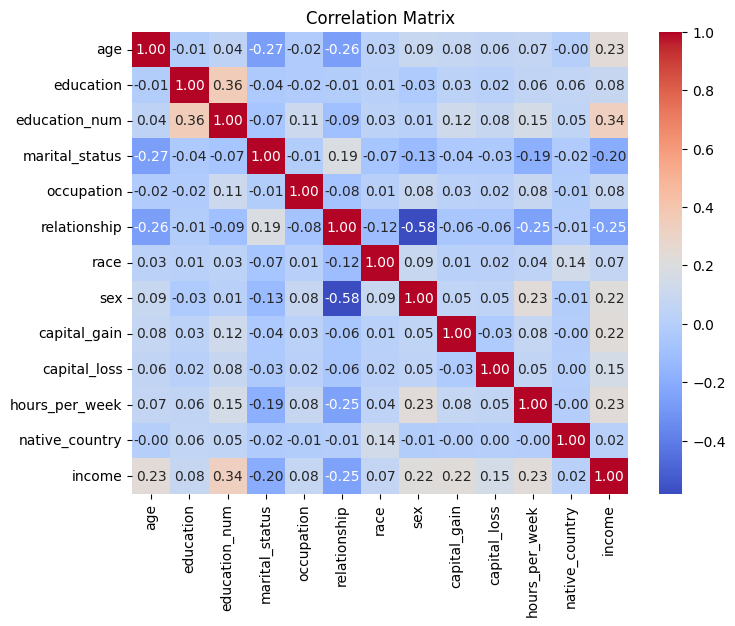

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Dropping columns with low correlation

reference_column = 'income'

correlation_threshold = 0.2

correlation_series = df.corr()[reference_column]

low_corr_columns = correlation_series[correlation_series < correlation_threshold].index

df = df.drop(low_corr_columns, axis=1)

df = df.drop("capital_gain", axis=1)
df

,age,education_num,sex,hours_per_week,income
0,50,13,1,13,0
1,38,9,1,40,0
2,53,7,1,40,0
3,28,13,0,40,0
4,37,14,0,40,0
...,...,...,...,...,...
32555,27,12,0,38,0
32556,40,9,1,40,1
32557,58,9,0,40,0
32558,22,9,1,20,0


<Axes: xlabel='income', ylabel='Count'>

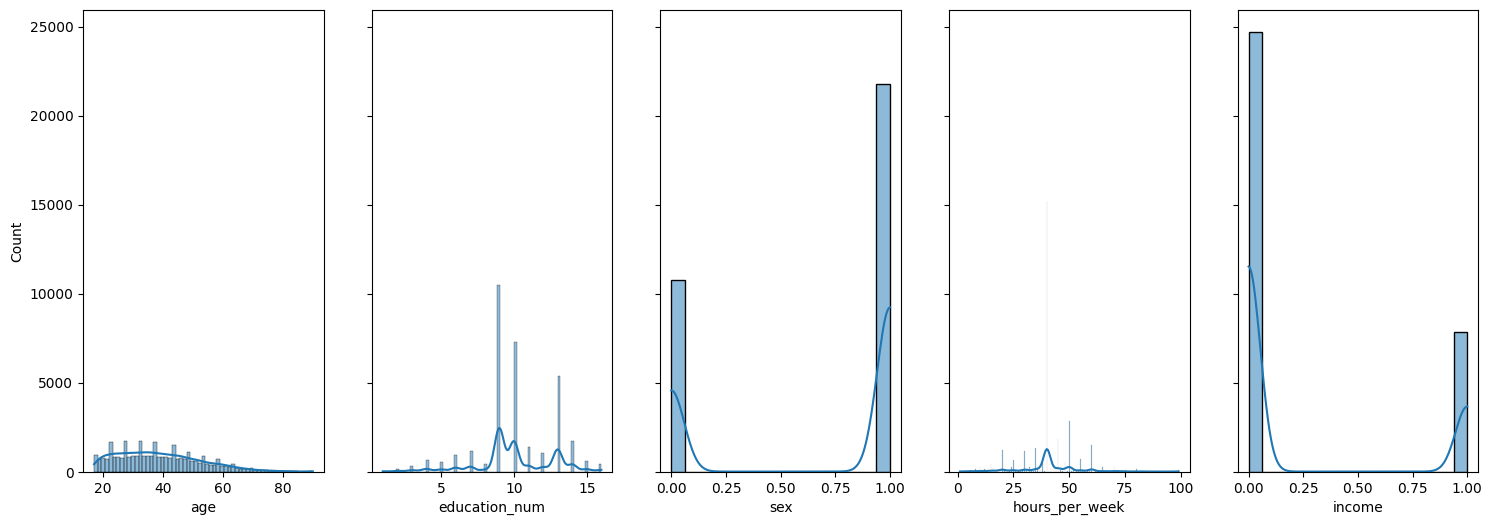

In [ ]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(18, 6), sharey=True)


columns = df.columns

sns.histplot(df, ax=axes[0], x=columns[0], kde=True)
sns.histplot(df, ax=axes[1], x=columns[1], kde=True)
sns.histplot(df, ax=axes[2], x=columns[2], kde=True)
sns.histplot(df, ax=axes[3], x=columns[3], kde=True)
sns.histplot(df, ax=axes[4], x=columns[4], kde=True)





In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="income")
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score
from mlxtend.plotting import plot_decision_regions

#Build the model:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
#Evaluate the model:
print("training set score: %f" % classifier.score(X_train, y_train))
print("test set score: %f" % classifier.score(X_test, y_test))

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(f1_score(y_test, y_pred))

training set score: 0.808277
test set score: 0.798833
0.5331432644333571


In [ ]:
import numpy as np

class NaiveBayesOwn:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X.values]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


nbo = NaiveBayesOwn()
nbo.fit(X_train, y_train)
predictions = nbo.predict(X_test)

print(f1_score(y_test, y_pred))

0.5331432644333571
